In [2]:
import imageio
from matplotlib import pyplot as plt 
import numpy as np
from scipy.ndimage import label
import SimpleITK as sitk
import torch
import pprint, pickle

In [3]:
full_ane_seg = '/root/workspace/renyan/output/nnUNet/nnUNet_raw_data/Task153_CellPress110new/labelsTs'
head_pred_ane_seg = '/root/workspace/renyan/output/nnUNet/nnUNet_trained_models/nnUNet/3d_fullres/Task154_CellPress110new_justhead/nnUNetTrainerV2__nnUNetPlansv2.1/fold_0/inferts10_ep200'
just_head_properties = '/root/workspace/renyan/data/CellPress110new_justhead/just_head_properties.pkl'

all_properties = pickle.load(just_head_properties)

(1031, 512, 512)
(1031, 512, 512)
1.0
0.0


In [ ]:
cases = sorted(os.listdir(full_ane_seg))
print (cases)
for case in cases:
    full = os.path.join(full_ane_seg,case)
    head_pred = os.path.join(head_pred_ane_seg,case)
    
    full_nii = sitk.ReadImage(full)
    full_np = sitk.GetArrayFromImage(full_nii).astype(np.int32)
    
    head_pred_nii = sitk.ReadImage(head_pred)
    head_pred_np = sitk.GetArrayFromImage(head_pred_nii).astype(np.int32)
    
    print ("full_np:",full_np.shape)
    print ("head_pred_np:",head_pred_np.shape)
    
    prediction = np.zeros(full_np.shape)
    print ('prediction:',prediction.shape)
    
    min_z, max_z, min_y, max_y, min_x, max_x = all_properties[case]['brain_coords']
    
    prediction[min_z:max_z,min_y:max_y,min_x:max_x] = head_pred_np
    
    pred_itk_image = sitk.GetImageFromArray(prediction)
    pred_itk_image.CopyInformation(full_nii)
    sitk.WriteImage(pred_itk_image, os.path.join(head_pred_ane_seg,case+'_full.nii.gz'))
    
    
    
    
    
    

In [ ]:
import imageio
pred_MIP_2 = imageio.imread('D:/codes/mycodes/test/pred/Tr0447.png',as_gray=True)
pred_MIP_2 = (pred_MIP_2/255).astype(np.uint8)
plt.imshow(pred_MIP_2)
print (np.unique(pred_MIP_2))


In [ ]:
brain_coord = np.where(pred_MIP_2 > 0)
brain_max_z = np.max(brain_coord[0])
brain_min_z = np.min(brain_coord[0])

print (brain_max_z)
print (brain_min_z)

In [ ]:
13//2


In [ ]:
def get_brain_coord(threedimage,brain_max_z,brain_min_z):
    
    for i in range(threedimage.shape[0]//2, threedimage.shape[0]):
        print (i)
        if np.sum(threedimage[i]) != 0:
            continue
        else:
            threedimage_max_z = i
            break
    max_z = max([threedimage_max_z,brain_max_z])
    min_z = brain_min_z
    
    
    for j in range(threedimage.shape[1]//2,threedimage.shape[1]):
        if np.sum(threedimage[:,j,:]) != 0:
            continue
        else:
            max_y = j
    for k in reversed(range(0,threedimage.shape[1]//2)):
        if np.sum(threedimage[:,j,:]) != 0:
            continue
        else:
            min_y = k
    
    for m in range(threedimage.shape[2]//2,threedimage.shape[1]):
        if np.sum(threedimage[:,:,m]) == 0:
            continue
        else:
            min_x = m
    for n in reversed(range(threedimage.shape[2])):
        if np.sum(threedimage[:,:,n]) == 0:
            continue
        else:
            max_x = n
            
    #threedimage = threedimage[min_z:max_z,min_y:max_y,min_x:max_x]
    
    return min_z,max_z,min_y,max_y,min_x,max_x

In [ ]:
def get_cube_as_coords(image,min_z,max_z,min_y,max_y,min_x,max_x):
    image = image[min_z:max_z,min_y:max_y,min_x:max_x]
    return image

In [ ]:
min_z,max_z,min_y,max_y,min_x,max_x = get_brain_coord(bone_image,brain_max_z,brain_min_z)

print (min_z,max_z,min_y,max_y,min_x,max_x)

In [27]:
from collections import OrderedDict
from batchgenerators.utilities.file_and_folder_operations import *

In [32]:

print (properties)
properties['Tr0966']['alll'] = 'alll'
print (properties)

save_pickle(properties,'D:/codes/mycodes/test/just_head_properties.pkl')

OrderedDict([('Tr0966', OrderedDict([('subset', 'Tr'), ('ori_cta', '/root/workspace/renyan/data/CellPress1338/cta_img/Tr0966_cta.nii.gz'), ('ori_seg', '/root/workspace/renyan/data/CellPress1338/ane_seg/Tr0966_seg.nii.gz'), ('ori_bone_cta', '/root/workspace/renyan/output/nnUNet/nnUNet_raw_data/Task153_CellPress110new/imagesTr/Tr0966_0002.nii.gz'), ('original_size_of_raw_data', array([264, 512, 512], dtype=int64)), ('original_spacing', array([0.40002441, 0.48046875, 0.48046875])), ('itk_origin', (-122.759765625, -310.259765625, -659.4000244140625)), ('itk_spacing', (0.48046875, 0.48046875, 0.4000244140625)), ('itk_direction', (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0))])), ('Tr0436', OrderedDict([('subset', 'Tr'), ('ori_cta', '/root/workspace/renyan/data/CellPress1338/cta_img/Tr0436_cta.nii.gz'), ('ori_seg', '/root/workspace/renyan/data/CellPress1338/ane_seg/Tr0436_seg.nii.gz'), ('ori_bone_cta', '/root/workspace/renyan/output/nnUNet/nnUNet_raw_data/Task153_CellPress110new/imagesTr/Tr0

In [34]:
properties = load_pickle('D:/codes/mycodes/test/just_head_properties.pkl')
properties

OrderedDict([('Tr0966',
              OrderedDict([('subset', 'Tr'),
                           ('ori_cta',
                            '/root/workspace/renyan/data/CellPress1338/cta_img/Tr0966_cta.nii.gz'),
                           ('ori_seg',
                            '/root/workspace/renyan/data/CellPress1338/ane_seg/Tr0966_seg.nii.gz'),
                           ('ori_bone_cta',
                            '/root/workspace/renyan/output/nnUNet/nnUNet_raw_data/Task153_CellPress110new/imagesTr/Tr0966_0002.nii.gz'),
                           ('original_size_of_raw_data',
                            array([264, 512, 512], dtype=int64)),
                           ('original_spacing',
                            array([0.40002441, 0.48046875, 0.48046875])),
                           ('itk_origin',
                            (-122.759765625,
                             -310.259765625,
                             -659.4000244140625)),
                           ('itk_spacing',
 

In [16]:
def remove_all_but_the_largest_connected_component(image: np.ndarray, for_which_classes: list, 
                                                   minimum_valid_object_size: dict = None):
    """
    removes all but the largest connected component, individually for each class
    :param image:
    :param for_which_classes: can be None. Should be list of int. Can also be something like [(1, 2), 2, 4].
    Here (1, 2) will be treated as a joint region, not individual classes (example LiTS here we can use (1, 2)
    to use all foreground classes together)
    :param minimum_valid_object_size: Only objects larger than minimum_valid_object_size will be removed. Keys in
    minimum_valid_object_size must match entries in for_which_classes
    :return:
    """
    if for_which_classes is None:
        for_which_classes = np.unique(image)
        for_which_classes = for_which_classes[for_which_classes > 0]

    assert 0 not in for_which_classes, "cannot remove background"
    largest_removed = {}
    kept_size = {}
    for c in for_which_classes:
        if isinstance(c, (list, tuple)):
            c = tuple(c)  # otherwise it cant be used as key in the dict
            mask = np.zeros_like(image, dtype=bool)
            for cl in c:
                mask[image == cl] = True
        else:
            mask = image == c
        # get labelmap and number of objects
        lmap, num_objects = label(mask.astype(int))
        
        print ('lmap:',lmap.shape)
        print ('num_objects:',num_objects)

        # collect object sizes
        object_sizes = {}
        for object_id in range(1, num_objects + 1):
            object_sizes[object_id] = (lmap == object_id).sum()
            
        print ('object_sizes:',object_sizes)

        largest_removed[c] = None
        kept_size[c] = None

        if num_objects > 0:
            # we always keep the largest object. We could also consider removing the largest object if it is smaller
            # than minimum_valid_object_size in the future but we don't do that now.
            maximum_size = max(object_sizes.values())
            kept_size[c] = maximum_size

            for object_id in range(1, num_objects + 1):
                # we only remove objects that are not the largest
                if object_sizes[object_id] != maximum_size:
                    # we only remove objects that are smaller than minimum_valid_object_size
                    remove = True
                    if minimum_valid_object_size is not None:
                        remove = object_sizes[object_id] < minimum_valid_object_size[c]
                    if remove:
                        image[(lmap == object_id) & mask] = 0
                        if largest_removed[c] is None:
                            largest_removed[c] = object_sizes[object_id]
                        else:
                            largest_removed[c] = max(largest_removed[c], object_sizes[object_id])
    return image, largest_removed, kept_size

lmap: (512, 495)
num_objects: 7
object_sizes: {1: 58, 2: 1, 3: 36536, 4: 4, 5: 1, 6: 3, 7: 15}
{1: 58}
{1: 36536}


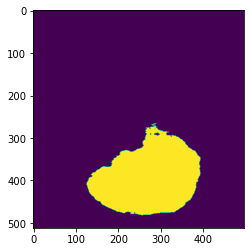

In [17]:
image, largest_removed, kept_size = remove_all_but_the_largest_connected_component(pred_MIP_2,[1])

plt.imshow(image)
print (largest_removed)
print (kept_size)

In [9]:
print (image.shape)

assert image.shape[0] == 512

for 

(512, 814)
